JAMAR SANDERS DSC_510_ADVANCED_HYPOTHESIS_TESTING_2024

Paired Data Analysis Below

Problem:
The problem involves analyzing how exchange rates changed between two specific years, 2016 and 2017, for various countries. The aim is to compare the exchange rate data for these two years to determine whether there is a significant difference in the exchange rates between these years across different countries.

Data:
The data consists of annual exchange rate values for multiple countries over time. The dataset contains the following columns:

Country: 
The name of the country.
Date: The date of the exchange rate record (this is converted to the year).
Exchange Rate: The exchange rate of the country's currency relative to a reference currency for a given year.
The dataset includes multiple records per country, with exchange rates recorded for several years.

Research Question:
Is there a significant difference in the exchange rates between 2016 and 2017 for each country?
This question is asking if the exchange rate change from 2016 to 2017 is statistically significant. Specifically, comparing two paired observations (2016 and 2017 exchange rates) for each country. The hypothesis test used to address this question is a paired t-test.

Paired t-test:
A paired t-test is appropriate here because I compare two related samples (exchange rates for the same countries in two different years). This test helps determine if there is a significant difference in the means of two paired samples.

Null Hypothesis (H0):
 The average difference in exchange rates between 2016 and 2017 is zero (no significant difference).
Alternative Hypothesis (H1): The average difference in exchange rates between 2016 and 2017 is not zero (there is a significant difference).
The t-test will help evaluate whether the observed differences in exchange rates between the two years are statistically significant or if they could have occurred by random chance.

Statistical Tests:
Paired T-Test: Assumes normality of differences.
Wilcoxon Test: Non-parametric alternative for non-normal data.

Assumptions:
Exchange rate differences are independent.
Data is paired by currency.

Remedies for Violations:
Use non-parametric tests (e.g., Wilcoxon) for non-normal data.
Log-transform data if variances are unequal.

Load and Read

In [29]:
import pandas as pd
from scipy import stats

# Load the cleaned data
data = pd.read_csv('C:/Users/jamar/Downloads/EXCHANGE_RATES_ANNUAL_DATASET.csv')

Data Cleaning via Formatting of Date 

In [30]:
# Ensure 'Date' is in datetime format, extracting the year if it's not
data['Year'] = pd.to_datetime(data['Date']).dt.year

Data Cleaning via filtering

In [31]:
# Filter the data for two years (e.g., 2016 and 2017)
filtered_data = data[data['Year'].isin([2016, 2017])]

Data Cleaning via Organization

In [32]:
# Pivot the data to have countries as rows, years as columns, and exchange rates as values
pivoted_data = filtered_data.pivot(index='Country', columns='Year', values='Exchange rate')

Data Cleaning via Removal

In [33]:
# Remove rows with missing data for the years of interest (2016, 2017)
pivoted_data = pivoted_data.dropna(subset=[2016, 2017])

Calculation and Check

In [34]:
# Calculate the difference between 2017 and 2016 for each country
pivoted_data['Difference'] = pivoted_data[2017] - pivoted_data[2016]

Paired t-test

In [35]:
# Perform the paired t-test for the difference
t_stat, p_value = stats.ttest_1samp(pivoted_data['Difference'], 0)

# Print the results
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

T-statistic: -1.078301351907209
P-value: 0.2937333811721347


Paired t-test differences

In [36]:
# Display the data with the difference
print(pivoted_data[['Difference']].head())

Year       Difference
Country              
Australia   -0.039572
Brazil      -0.292900
Canada      -0.025900
China        0.116900
Denmark     -0.131900


Paired Data Analysis Visualizations

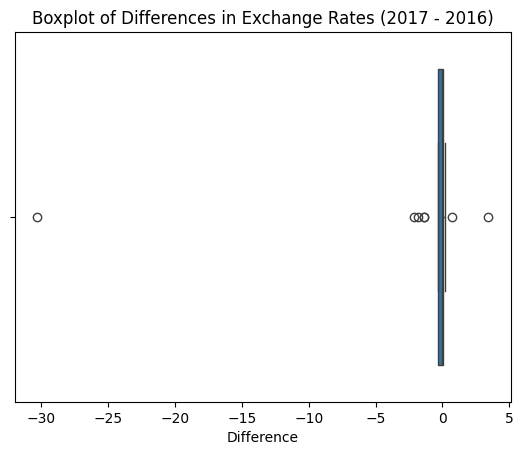

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot for the differences in exchange rates
sns.boxplot(x=pivoted_data['Difference'])
plt.title('Boxplot of Differences in Exchange Rates (2017 - 2016)')
plt.show()

Multiple Population Means Below

Problem:
The task involves analyzing house prices from different categories (e.g., all houses, new houses, modern houses, older houses) across multiple years to understand whether there are significant differences between these groups.

Research Question:
Do house prices for different categories (All, New, Modern, Older) differ significantly from each other?

Appropriate Statistical Test:
To analyze this, I use One-Way ANOVA (Analysis of Variance). This test compares the means of more than two groups to determine if at least one group is statistically different from the others.

Assumptions of One-Way ANOVA:
Independence of observations: 
The data from each group should be independent of the others.
Normality: The data within each group should be approximately normally distributed.
Homogeneity of variance: The variances within each group should be approximately equal.

Potential Consequences of Violating Assumptions:
Independence: If observations are not independent, the results of the test could be biased.
Normality: If the data is not normally distributed, the results may not be reliable, especially for smaller sample sizes.
Homogeneity of variance: If variances are not equal, the ANOVA results could be misleading. A test like Welch's ANOVA could be used in such cases.

Remedies for Violating Assumptions:
Independence: Ensure the data is collected properly.
Normality: Use non-parametric tests (e.g., Kruskal-Wallis) if normality is violated.
Homogeneity of variance: Use Welch's ANOVA or transform the data.

Python Tool for Interpretation:
SciPy for the ANOVA test and Matplotlib or Seaborn for visualizations.

Load And Print

In [37]:
import pandas as pd

# Load the data from the given file path
data = pd.read_csv('C:/Users/jamar/Downloads/HOUSE_PRICES_ANNUAL_DATASET.csv')

# Print the first few rows of the dataset to inspect the data
print(data.head())

         Date  Price (All)  Change (All)  Price (New)  Change (New)  \
0  1952-11-01         1891           0.0         2107           0.0   
1  1953-02-01         1891           0.0         2107           0.0   
2  1953-05-01         1891           0.0         2107           0.0   
3  1953-08-01         1881           0.0         2117           0.0   
4  1953-11-01         1872          -1.0         2117           0.5   

   Price (Modern)  Change (Modern)  Price (Older)  Change (Older)  
0            2020              0.0           1524             0.0  
1            2002              0.0           1542             0.0  
2            2002              0.0           1542             0.0  
3            2002              0.0           1524             0.0  
4            1975             -2.2           1542             1.2  


Column Extraction

In [39]:
# Extract the relevant columns for analysis
prices = data[['Price (All)', 'Price (New)', 'Price (Modern)', 'Price (Older)']]

# Print the first few rows to check if the data looks correct
print(prices.head())

   Price (All)  Price (New)  Price (Modern)  Price (Older)
0         1891         2107            2020           1524
1         1891         2107            2002           1542
2         1891         2107            2002           1542
3         1881         2117            2002           1524
4         1872         2117            1975           1542


Statistics Performance

In [40]:
from scipy import stats

# Perform One-Way ANOVA
f_stat, p_value = stats.f_oneway(prices['Price (All)'].dropna(), 
                                 prices['Price (New)'].dropna(), 
                                 prices['Price (Modern)'].dropna(), 
                                 prices['Price (Older)'].dropna())

# Print the results of the ANOVA test
print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

F-statistic: 3.717332313362784
P-value: 0.01120781686637583


Multpile Population Means Visualization

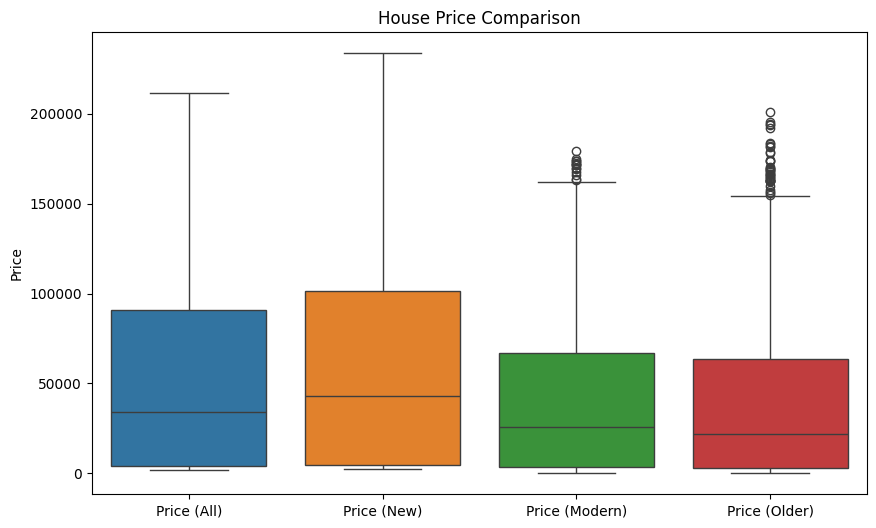

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a boxplot for the different price categories
plt.figure(figsize=(10,6))
sns.boxplot(data=prices)
plt.title('House Price Comparison')
plt.ylabel('Price')
plt.show()

Variance Comparison Analysis Below

Problem:
The problem involves comparing the variances in the monthly investor flow data across different categories (e.g., Domestic Equity, World Equity, Total Bond) to determine if there is a significant difference in variability between these categories. By comparing the variance in the investor flow for each category, we can assess if certain categories experience more volatile investor behavior than others.

Data:
The data consists of monthly investor flow information for different types of investments:

Date: The date of the record.
Total Equity: Total investor flow in equity investments.

Domestic Equity: 
Investor flow in domestic equity.

World Equity: 
Investor flow in world equity.

Hybrid: 
Investor flow in hybrid investments.

Total Bond: 
Total investor flow in bond investments.

Taxable Bond: 
Investor flow in taxable bonds.

Municipal Bond: 
Investor flow in municipal bonds.

Total: 
The total investor flow across all categories.
This dataset includes monthly records over several years, allowing for variance comparison across different categories of investment flow.

Research Question:
The primary research question is:
Is there a significant difference in the variances of investor flows across different investment categories (such as Domestic Equity, World Equity, and Total Bond)?
In other words, we are interested in knowing if the variability (spread or dispersion) of the monthly investor flow differs significantly between different investment categories.

Appropriate Statistical Test:
For this type of analysis, an F-test for variance comparison is appropriate. The F-test compares the variances of two or more groups to determine if they are significantly different. In the case of multiple categories, the Levene’s test or Bartlett’s test could also be used to check for equality of variances, depending on the assumptions about normality.

Null Hypothesis (H0): 
The variances of the investor flow across all investment categories are equal.

Alternative Hypothesis (H1): 
At least one pair of categories has different variances.
The F-test will help determine if there is more variability in the investor flow for certain categories compared to others, or if the observed differences are due to random chance.

Assumptions Underlying the Hypothesis Test:
Normality: 
The data for each group (investment category) should be approximately normally distributed. The F-test is sensitive to deviations from normality.

Consequence of Violating: 
If the data is not normally distributed, the results of the F-test may not be reliable.

Remedy: 
If normality is violated, you can apply transformations (e.g., log transformation) or use non-parametric tests like Levene’s test, which is less sensitive to non-normality.

Independence: 
The observations within each group should be independent of each other.

Consequence of Violating: 
If observations are not independent (e.g., if there’s autocorrelation in the time series), the test results might be biased.

Remedy: 
If independence is violated, consider using methods that account for autocorrelation or dependent samples.

Homogeneity of Variance (Equality of Variances): 
The variances of each group being compared should be roughly equal.

Consequence of Violating: 
If variances are significantly unequal, the F-test may give incorrect conclusions.

Remedy:
 If variances are unequal, consider using Welch’s F-test or transform the data to stabilize the variances.

Python Tool for Interpretation and Visualization:
To assist with the interpretation of the results, I use several Python tools:
SciPy for performing the statistical test (e.g., stats.f_oneway() for the F-test or stats.levene() for Levene’s test).

Matplotlib/Seaborn for visualizing the data distribution and variances across groups:
I use boxplots to visualize the spread and variance of the data for each category.
NumPy/Pandas for data manipulation and computing summary statistics (mean, variance, etc.).
Statsmodels can be used for more advanced statistical analysis and hypothesis testing.

Load and Inspect

In [44]:
import pandas as pd

# Load the data
data = pd.read_csv('C:/Users/jamar/Downloads/INVESTOR_FLOW_MONTHLY_DATASET.csv')

# Print the first few rows of the dataset to inspect the data
print(data.head())

         Date  Total Equity  Domestic Equity  World Equity  Hybrid  \
0  2007-01-31         27364             5723         21641    5321   
1  2007-02-28         25306             8411         16895    5164   
2  2007-03-31          6551             -486          7037    3764   
3  2007-04-30         16063             -163         16225    4384   
4  2007-05-31         -2876           -14176         11300    4318   

   Total Bond  Taxable Bond  Municipal Bond  Total  
0       15287         12453            2834  47972  
1       15064         11926            3137  45533  
2       15782         12925            2857  26097  
3       13701         12346            1355  34148  
4       20813         17215            3598  22256  


Column Extraction

In [45]:
# Extract the columns for analysis
columns_of_interest = ['Domestic Equity', 'World Equity', 'Hybrid', 'Total Bond']

# Remove any rows with NaN values in the columns of interest
clean_data = data[columns_of_interest].dropna()

# Print the cleaned data to check for NaN values and the structure
print(clean_data.head())

   Domestic Equity  World Equity  Hybrid  Total Bond
0             5723         21641    5321       15287
1             8411         16895    5164       15064
2             -486          7037    3764       15782
3             -163         16225    4384       13701
4           -14176         11300    4318       20813


Statistics Perfromance

In [46]:
import scipy.stats as stats

# Perform Levene's test to compare the variances of the selected groups
stat, p_value = stats.levene(clean_data['Domestic Equity'], 
                             clean_data['World Equity'], 
                             clean_data['Hybrid'],
                             clean_data['Total Bond'])

# Print the results
print(f'Levene’s test statistic: {stat}')
print(f'P-value: {p_value}')

Levene’s test statistic: 28.845186144232553
P-value: 7.409379551981056e-17


Variance Comparison Analysis Visualizations

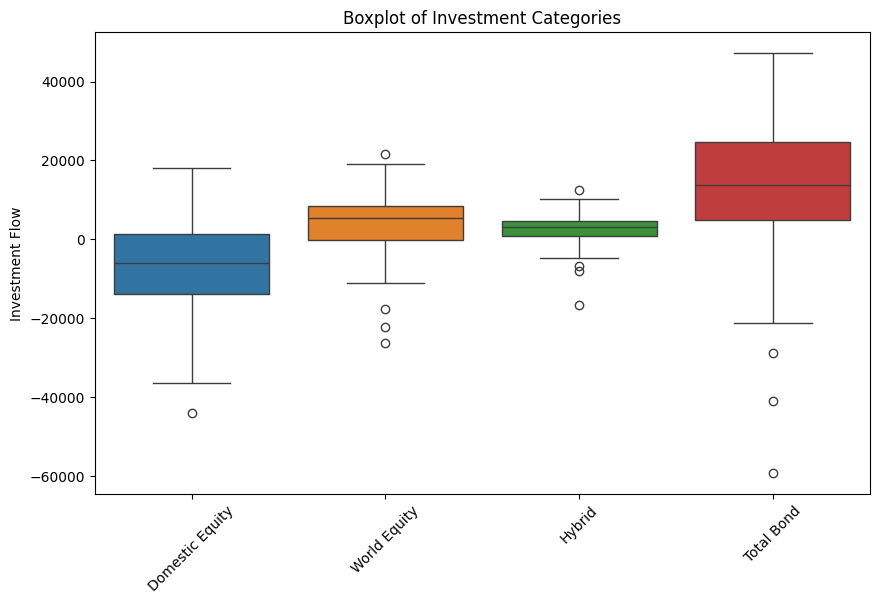

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualization of the distributions (Boxplots)
plt.figure(figsize=(10, 6))
sns.boxplot(data=clean_data[columns_of_interest])
plt.title('Boxplot of Investment Categories')
plt.ylabel('Investment Flow')
plt.xticks(rotation=45)
plt.show()